In [1]:
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv2
import tensorflow as tf

In [4]:
model = tf.keras.applications.vgg16.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

model2 = tf.keras.Model(model.input, model.layers[-2].output)
model2.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [6]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    "testing_database",
    color_mode='rgb',
    shuffle=False,
    batch_size=1,
    image_size=(224, 224),
)


Found 225 files belonging to 1 classes.


In [10]:
result = model2.predict(test_ds)

result.shape

225/225 [==============================] - 9s 41ms/step


(225, 4096)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


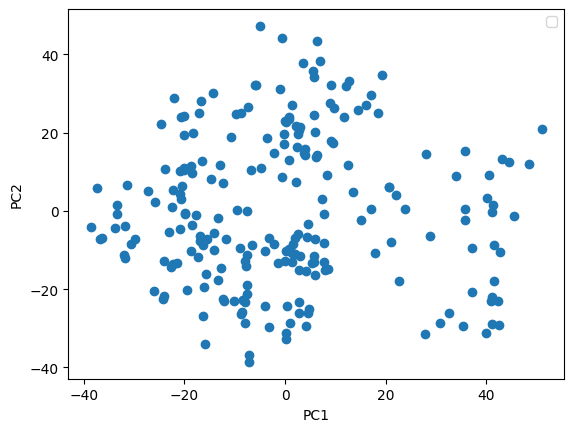

In [19]:
from sklearn.decomposition import PCA
  

pca = PCA(n_components=16)
x_new = pca.fit_transform(result)
plt.scatter(x_new[:,0], x_new[:,1])
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

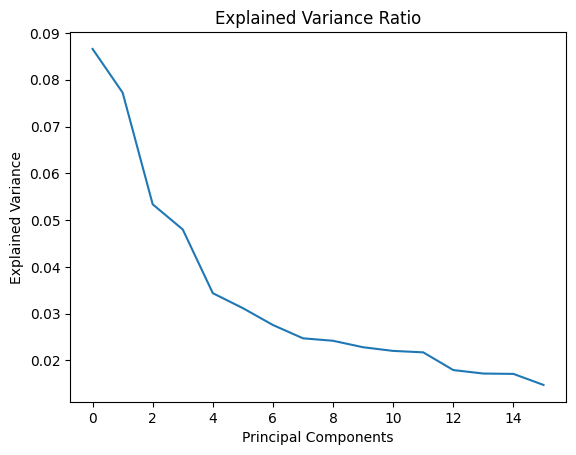

In [20]:
# Plot
plt.plot(range(0,16), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()

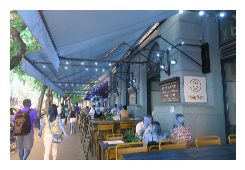

0.0
26.247547
63.758358
72.49414
61.092808
60.922817
78.883026
79.5459
52.727665
48.954475
62.177483
48.57687
56.409557
77.13816
69.14441
65.808556
55.952026
62.263885
61.6764
65.54146
55.814495
73.98735
79.582115
82.53443
73.84241
67.57181
57.415554
59.872852
56.718487
58.141647
68.66885
62.154617
66.61389
55.11896
55.74177
82.97333
87.55846
89.94189
85.25187
84.96767
73.044556
70.31688
66.32946
67.27536
57.697605
69.8327
77.68334
75.82376
67.85956
76.2209
65.34022
69.21505
71.83652
54.63698
62.469593
83.675705
83.85916
72.09774
66.65225
64.31828
74.712616
69.97643
62.205433
53.869526
55.563446
59.200794
57.255424
66.18871
66.46175
58.40983
63.287453
53.254375
66.39061
54.769447
53.84733
55.491043
41.937775
48.464066
60.624706
67.08818
77.893585
76.4587
70.12092
75.24586
68.01374
68.10725
81.0012
83.32387
87.90799
79.27545
79.20035
78.71583
53.02416
63.142284
64.36288
55.301334
55.89925
45.47843
54.015408
72.03456
65.547844
57.415977
53.85874
51.405296
52.091114
51.036312
43.628563
42

In [31]:
filenames = glob(os.path.join("testing_database\\Budapest", "*.jpg"))

i = 0
img1 = cv2.imread(filenames[i])
plt.subplot(1,2,1)
plt.imshow(img1)
plt.axis("off")
plt.show()

vec1 = x_new[i]
for vec2 in x_new:
    dist = np.linalg.norm(vec1 - vec2)
    print(dist)


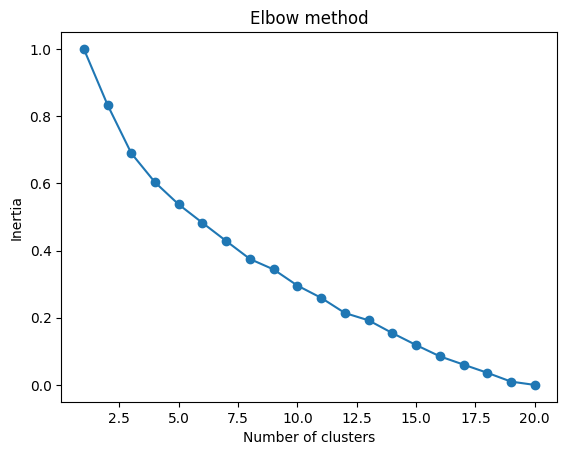

In [52]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

inertias = []

for i in range(1,21):
    kmeans = KMeans(n_clusters=i, n_init=20)
    kmeans.fit(x_new)
    inertias.append(kmeans.inertia_)
    
min_max_scaler = preprocessing.MinMaxScaler()
inertias = min_max_scaler.fit_transform(np.array(inertias).reshape((-1,1)))

plt.plot(range(1,21), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

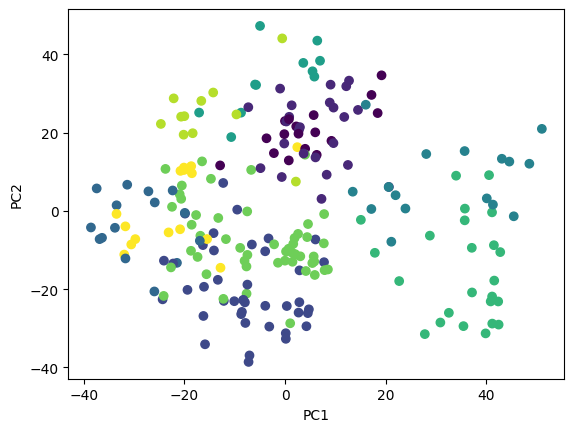

In [71]:
kmeans = KMeans(n_clusters=10, n_init=20)
kmeans.fit(x_new)
plt.scatter(x_new[:,0], x_new[:,1], c=kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [72]:
kmeans.labels_

array([4, 4, 7, 7, 7, 7, 9, 9, 2, 2, 7, 2, 2, 6, 6, 2, 6, 2, 2, 0, 0, 0,
       0, 0, 7, 0, 2, 2, 2, 2, 2, 7, 7, 7, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2,
       2, 1, 1, 1, 1, 1, 3, 2, 3, 2, 2, 6, 6, 6, 2, 2, 6, 6, 6, 2, 2, 6,
       6, 6, 2, 2, 7, 0, 2, 2, 2, 2, 2, 2, 6, 7, 7, 6, 6, 6, 9, 2, 7, 7,
       7, 7, 7, 7, 2, 2, 2, 8, 2, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 9,
       8, 0, 0, 0, 9, 9, 7, 9, 7, 6, 3, 6, 3, 6, 7, 7, 7, 2, 2, 2, 6, 7,
       2, 2, 5, 5, 5, 4, 9, 9, 9, 5, 9, 5, 7, 6, 6, 7, 7, 7, 1, 7, 7, 7,
       7, 7, 7, 7, 2, 3, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 7, 1, 1, 1, 1, 7,
       1, 1, 1, 6, 1, 7, 1, 1, 7, 7, 7, 7, 0, 0, 3, 7, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 5, 5, 5, 5, 9, 9, 9, 9, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 4, 4, 4, 6])

[  8   9  11  12  15  17  18  26  27  28  29  30  42  43  44  51  53  54
  58  59  63  64  68  69  72  73  74  75  76  77  85  92  93  94  96 127
 128 129 132 133 158]


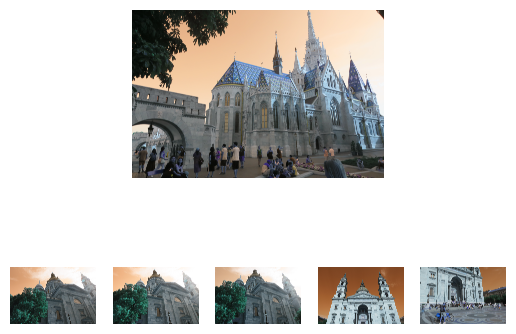

In [77]:
filenames = glob(os.path.join("testing_database\\Budapest", "*.jpg"))

N = 5

i = 64
img1 = cv2.imread(filenames[i])
plt.subplot(2,N,(1,N))
plt.imshow(img1)
plt.axis("off")

cluster = kmeans.labels_[i]
same_cluster_imgs = np.where(kmeans.labels_ == cluster)[0]


print(same_cluster_imgs)
for j in range(N):
    plt.subplot(2,N,j+1+N)
    img = cv2.imread(filenames[same_cluster_imgs[j]])
    plt.imshow(img)
    plt.axis("off")

plt.show()